In [1]:
#Importing necessary dependencies
import pandas as pd
import geopandas as gpd
from shapely import wkt

In [2]:
#Importing dataframes
commute = pd.read_csv('../../../data/clean/commute_demographics.csv')
education = pd.read_csv('../../../data/clean/education_demographics.csv')
income = pd.read_csv('../../../data/clean/income_demographics.csv')
internet = pd.read_csv('../../../data/clean/internet_demographics.csv')
population = pd.read_csv('../../../data/clean/population_demographics.csv')

In [3]:
#Looking over commute data
commute.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,occupied housing units: 4 vehicles available,occupied housing units: 5 or more vehicles available,renter-occupied housing units,renter-occupied housing units: no vehicle available,renter-occupied housing units: 1 vehicle available,renter-occupied housing units: 2 vehicles available,renter-occupied housing units: 3 vehicles available,renter-occupied housing units: 4 vehicles available,renter-occupied housing units: 5 or more vehicles available,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,33.0,2224,1914,1655,259,106,...,66,0,510,80,337,93,0,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,31.0,2650,2186,1877,309,137,...,72,20,1178,157,772,167,79,3,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,32.0,2399,2174,2099,75,107,...,24,15,494,31,343,120,0,0,0,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,33.0,2430,2202,2104,98,66,...,67,8,194,0,67,127,0,0,0,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,32.0,1639,1425,1386,39,80,...,33,103,85,26,32,27,0,0,0,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."


In [4]:
#Adding ratio data
commute['percent public transport'] = commute['workers 16 years and over: public transportation (includes taxicab)']/commute['workers 16 years and over']
commute = commute.sort_values(by='percent public transport', ascending = False)
commute.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,occupied housing units: 5 or more vehicles available,renter-occupied housing units,renter-occupied housing units: no vehicle available,renter-occupied housing units: 1 vehicle available,renter-occupied housing units: 2 vehicles available,renter-occupied housing units: 3 vehicles available,renter-occupied housing units: 4 vehicles available,renter-occupied housing units: 5 or more vehicles available,geometry,percent public transport
249,17031842500,"Census Tract 8425, Cook County, Illinois",1075294,0,43.0,620,201,180,21,409,...,0,836,564,245,11,16,0,0,"POLYGON ((-87.629828 41.779991, -87.629351 41....",0.659677
829,17031030603,"Census Tract 306.03, Cook County, Illinois",116000,0,40.0,1541,363,315,48,943,...,0,1245,805,410,30,0,0,0,"POLYGON ((-87.65995 41.987274, -87.659418 41.9...",0.611940
324,17031351400,"Census Tract 3514, Cook County, Illinois",323957,0,36.0,461,108,93,15,271,...,4,705,494,173,34,0,0,4,"POLYGON ((-87.626492 41.831018, -87.626479 41....",0.587852
639,17031070103,"Census Tract 701.03, Cook County, Illinois",69094,0,36.0,1214,188,185,3,712,...,0,1030,640,380,10,0,0,0,"POLYGON ((-87.643814 41.928121, -87.643737 41....",0.586491
696,17031031502,"Census Tract 315.02, Cook County, Illinois",161705,0,35.0,2243,613,569,44,1286,...,0,2128,1397,587,144,0,0,0,"POLYGON ((-87.653742 41.965444, -87.652876 41....",0.573339


In [5]:
#Converting df to gdf
commute['geometry'] = commute['geometry'].apply(wkt.loads)
commute = gpd.GeoDataFrame(commute, crs="EPSG:4326", geometry=commute['geometry'])
commute.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,occupied housing units: 5 or more vehicles available,renter-occupied housing units,renter-occupied housing units: no vehicle available,renter-occupied housing units: 1 vehicle available,renter-occupied housing units: 2 vehicles available,renter-occupied housing units: 3 vehicles available,renter-occupied housing units: 4 vehicles available,renter-occupied housing units: 5 or more vehicles available,geometry,percent public transport
249,17031842500,"Census Tract 8425, Cook County, Illinois",1075294,0,43.0,620,201,180,21,409,...,0,836,564,245,11,16,0,0,"POLYGON ((-87.62983 41.77999, -87.62935 41.780...",0.659677
829,17031030603,"Census Tract 306.03, Cook County, Illinois",116000,0,40.0,1541,363,315,48,943,...,0,1245,805,410,30,0,0,0,"POLYGON ((-87.65995 41.98727, -87.65942 41.987...",0.611940
324,17031351400,"Census Tract 3514, Cook County, Illinois",323957,0,36.0,461,108,93,15,271,...,4,705,494,173,34,0,0,4,"POLYGON ((-87.62649 41.83102, -87.62648 41.831...",0.587852
639,17031070103,"Census Tract 701.03, Cook County, Illinois",69094,0,36.0,1214,188,185,3,712,...,0,1030,640,380,10,0,0,0,"POLYGON ((-87.64381 41.92812, -87.64374 41.928...",0.586491
696,17031031502,"Census Tract 315.02, Cook County, Illinois",161705,0,35.0,2243,613,569,44,1286,...,0,2128,1397,587,144,0,0,0,"POLYGON ((-87.65374 41.96544, -87.65288 41.965...",0.573339


Text(0.5, 1.0, 'Percent of Commuters Using Public Transportation')

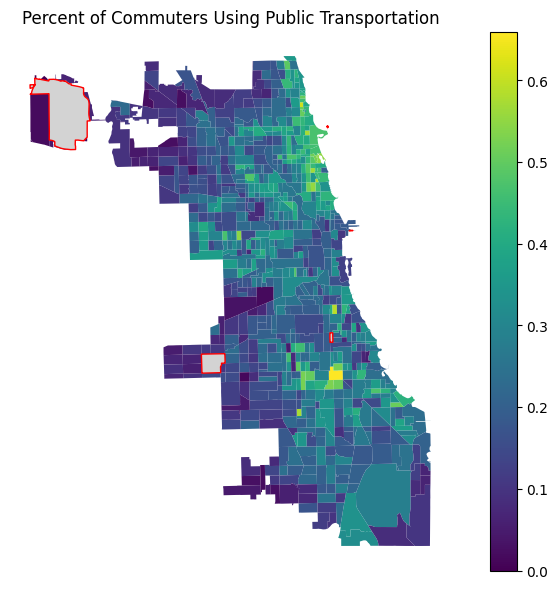

In [6]:
ax = commute.plot(column = 'percent public transport', legend = True, 
                figsize=(10,7),missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "label": "Missing values",
    })


ax.set_axis_off()
ax.set_title("Percent of Commuters Using Public Transportation")

In [7]:
#getting owner occupied households
commute['owner occupied households'] = commute['occupied housing units']-commute['renter-occupied housing units']
commute = commute.sort_values(by='owner occupied households', ascending = False)
commute.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,renter-occupied housing units,renter-occupied housing units: no vehicle available,renter-occupied housing units: 1 vehicle available,renter-occupied housing units: 2 vehicles available,renter-occupied housing units: 3 vehicles available,renter-occupied housing units: 4 vehicles available,renter-occupied housing units: 5 or more vehicles available,geometry,percent public transport,owner occupied households
394,17031081800,"Census Tract 818, Cook County, Illinois",701139,44573,25.0,9212,2289,2185,104,1669,...,4007,1820,1904,283,0,0,0,"POLYGON ((-87.64384 41.89646, -87.64381 41.896...",0.181177,3030
364,17031330102,"Census Tract 3301.02, Cook County, Illinois",402828,0,32.0,6185,2338,1916,422,1972,...,2942,1472,1252,218,0,0,0,"POLYGON ((-87.62667 41.86749, -87.62655 41.867...",0.318836,2932
399,17031833100,"Census Tract 8331, Cook County, Illinois",922812,0,25.0,6021,2140,2003,137,1184,...,1625,566,998,61,0,0,0,"POLYGON ((-87.66680 41.88146, -87.66670 41.881...",0.196645,2748
769,17031120300,"Census Tract 1203, Cook County, Illinois",2055073,0,35.0,3379,2314,2012,302,281,...,88,0,39,49,0,0,0,"POLYGON ((-87.74834 41.99729, -87.74820 41.997...",0.083161,2480
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,25.0,5315,1493,1448,45,559,...,2577,1312,1031,234,0,0,0,"POLYGON ((-87.62086 41.88188, -87.62082 41.882...",0.105174,2360


<Axes: >

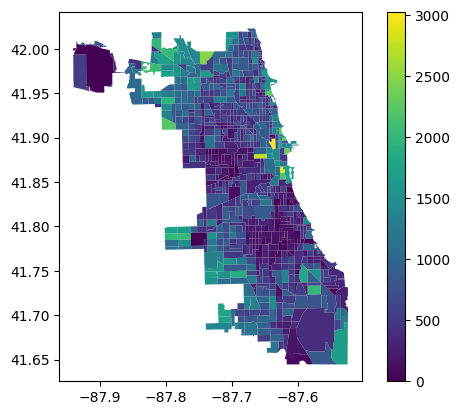

In [8]:
commute.plot(column = 'owner occupied households', legend = True)

Correlation between number of vehicles availble and number of workers taking public transport

In [9]:
print('The correlation of NO CARS to PUBLIC TRANSPORT', 
      commute['occupied housing units: no vehicle available'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))                    
print('The correlation of 1 CAR to PUBLIC TRANSPORT', 
      commute['occupied housing units: 1 vehicle available'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))                    
print('The correlation of 2 CARS to PUBLIC TRANSPORT', 
      commute['occupied housing units: 2 vehicles available'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))                    
print('The correlation of 3 CARS to PUBLIC TRANSPORT', 
      commute['occupied housing units: 3 vehicles available'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))                    
print('The correlation of 4 CARS to PUBLIC TRANSPORT', 
      commute['occupied housing units: 4 vehicles available'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))                    
print('The correlation of 5 CARS to PUBLIC TRANSPORT', 
      commute['occupied housing units: 5 or more vehicles available'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))                    


The correlation of NO CARS to PUBLIC TRANSPORT 0.7017239519496355
The correlation of 1 CAR to PUBLIC TRANSPORT 0.7202806182770283
The correlation of 2 CARS to PUBLIC TRANSPORT 0.11377115904252198
The correlation of 3 CARS to PUBLIC TRANSPORT -0.15625875751126367
The correlation of 4 CARS to PUBLIC TRANSPORT -0.12894552859802294
The correlation of 5 CARS to PUBLIC TRANSPORT -0.10285487136922385


Correlation between number of vehicles and number of workers carpooling

In [10]:
print('The correlation of NO CARS to CARPOOLED', 
      commute['occupied housing units: no vehicle available'].corr(commute['workers 16 years and over: carpooled']))                    
print('The correlation of 1 CAR to CARPOOLED', 
      commute['occupied housing units: 1 vehicle available'].corr(commute['workers 16 years and over: carpooled']))                    
print('The correlation of 2 CARS to CARPOOLED', 
      commute['occupied housing units: 2 vehicles available'].corr(commute['workers 16 years and over: carpooled']))                    
print('The correlation of 3 CARS to CARPOOLED', 
      commute['occupied housing units: 3 vehicles available'].corr(commute['workers 16 years and over: carpooled']))                    
print('The correlation of 4 CARS to CARPOOLED', 
      commute['occupied housing units: 4 vehicles available'].corr(commute['workers 16 years and over: carpooled']))                    
print('The correlation of 5 CARS to CARPOOLED', 
      commute['occupied housing units: 5 or more vehicles available'].corr(commute['workers 16 years and over: carpooled']))                    


The correlation of NO CARS to CARPOOLED -0.08245163506376818
The correlation of 1 CAR to CARPOOLED 0.1685142164762683
The correlation of 2 CARS to CARPOOLED 0.4896766069304216
The correlation of 3 CARS to CARPOOLED 0.547502183151063
The correlation of 4 CARS to CARPOOLED 0.4792860162419632
The correlation of 5 CARS to CARPOOLED 0.31761417967291494


Correlation between number of vehicles and number of workers driving alone

In [11]:
print('The correlation of NO CARS to DROVE ALONE', 
      commute['occupied housing units: no vehicle available'].corr(commute['workers 16 years and over: drove alone']))                    
print('The correlation of 1 CAR to DROVE ALONE', 
      commute['occupied housing units: 1 vehicle available'].corr(commute['workers 16 years and over: drove alone']))                    
print('The correlation of 2 CARS to DROVE ALONE', 
      commute['occupied housing units: 2 vehicles available'].corr(commute['workers 16 years and over: drove alone']))                    
print('The correlation of 3 CARS to DROVE ALONE', 
      commute['occupied housing units: 3 vehicles available'].corr(commute['workers 16 years and over: drove alone']))                    
print('The correlation of 4 CARS to DROVE ALONE', 
      commute['occupied housing units: 4 vehicles available'].corr(commute['workers 16 years and over: drove alone']))                    
print('The correlation of 5 CARS to DROVE ALONE', 
      commute['occupied housing units: 5 or more vehicles available'].corr(commute['workers 16 years and over: drove alone']))                    


The correlation of NO CARS to DROVE ALONE 0.017142136039187704
The correlation of 1 CAR to DROVE ALONE 0.4820944023752159
The correlation of 2 CARS to DROVE ALONE 0.8839010359493482
The correlation of 3 CARS to DROVE ALONE 0.7257635381200741
The correlation of 4 CARS to DROVE ALONE 0.6042975051978751
The correlation of 5 CARS to DROVE ALONE 0.4330481758966847


In [12]:
commute

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,renter-occupied housing units,renter-occupied housing units: no vehicle available,renter-occupied housing units: 1 vehicle available,renter-occupied housing units: 2 vehicles available,renter-occupied housing units: 3 vehicles available,renter-occupied housing units: 4 vehicles available,renter-occupied housing units: 5 or more vehicles available,geometry,percent public transport,owner occupied households
394,17031081800,"Census Tract 818, Cook County, Illinois",701139,44573,25.0,9212,2289,2185,104,1669,...,4007,1820,1904,283,0,0,0,"POLYGON ((-87.64384 41.89646, -87.64381 41.896...",0.181177,3030
364,17031330102,"Census Tract 3301.02, Cook County, Illinois",402828,0,32.0,6185,2338,1916,422,1972,...,2942,1472,1252,218,0,0,0,"POLYGON ((-87.62667 41.86749, -87.62655 41.867...",0.318836,2932
399,17031833100,"Census Tract 8331, Cook County, Illinois",922812,0,25.0,6021,2140,2003,137,1184,...,1625,566,998,61,0,0,0,"POLYGON ((-87.66680 41.88146, -87.66670 41.881...",0.196645,2748
769,17031120300,"Census Tract 1203, Cook County, Illinois",2055073,0,35.0,3379,2314,2012,302,281,...,88,0,39,49,0,0,0,"POLYGON ((-87.74834 41.99729, -87.74820 41.997...",0.083161,2480
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,25.0,5315,1493,1448,45,559,...,2577,1312,1031,234,0,0,0,"POLYGON ((-87.62086 41.88188, -87.62082 41.882...",0.105174,2360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,17031350100,"Census Tract 3501, Cook County, Illinois",567876,518735,34.0,1448,679,617,62,502,...,1501,675,732,94,0,0,0,"POLYGON ((-87.61721 41.84566, -87.61692 41.845...",0.346685,0
175,17031980100,"Census Tract 9801, Cook County, Illinois",2981781,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,"POLYGON ((-87.76206 41.79274, -87.76170 41.792...",NaN,0
302,17031381700,"Census Tract 3817, Cook County, Illinois",196802,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,"POLYGON ((-87.62895 41.80662, -87.62892 41.808...",NaN,0
816,17031980000,"Census Tract 9800, Cook County, Illinois",19890200,92402,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,"MULTIPOLYGON (((-87.93505 42.00582, -87.93484 ...",NaN,0


In [13]:
print('The correlation of renter-occupied households to percent of public transport is',
      commute['renter-occupied housing units'].corr(commute['percent public transport']))  
print('The correlation of renter-occupied households to public transport is',
      commute['renter-occupied housing units'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))  
print('The correlation of renter-occupied households to car, truck, or van is',
      commute['renter-occupied housing units'].corr(commute['workers 16 years and over: car, truck, or van']))                    
print('The correlation of renter-occupied households to commute time is',
      commute['renter-occupied housing units'].corr(commute['average commute to work (in min)']))                    


The correlation of renter-occupied households to percent of public transport is 0.331650946078303
The correlation of renter-occupied households to public transport is 0.7580629334761444
The correlation of renter-occupied households to car, truck, or van is 0.2159932841242538
The correlation of renter-occupied households to commute time is -0.08388054075555615


In [14]:
print('The correlation of owner-occupied homes to percent of public transport is', 
      commute['owner occupied households'].corr(commute['percent public transport']))
print('The correlation of owner-occupied homes to public transport is', 
      commute['owner occupied households'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))
print('The correlation of owner-occupied homes to car, truck, or van is', 
      commute['owner occupied households'].corr(commute['workers 16 years and over: car, truck, or van']))
print('The correlation of owner-occupied homes to commute time is', 
      commute['owner occupied households'].corr(commute['average commute to work (in min)']))


The correlation of owner-occupied homes to percent of public transport is -0.3693934233666074
The correlation of owner-occupied homes to public transport is 0.3023784744582333
The correlation of owner-occupied homes to car, truck, or van is 0.780491060060422
The correlation of owner-occupied homes to commute time is -0.12957303202898238


In [15]:
print('The correlation of commute time to car, truck, or van is',
      commute['average commute to work (in min)'].corr(commute['workers 16 years and over: car, truck, or van']))                    
print('The correlation of commute time to public transportation is',
      commute['average commute to work (in min)'].corr(commute['workers 16 years and over: public transportation (includes taxicab)']))                    


The correlation of commute time to car, truck, or van is -0.055002194014657765
The correlation of commute time to public transportation is -0.029789537131209846


In [16]:
incomemer = income.iloc[:,1:25]
incomemer = incomemer.drop(columns =['current land area (sq. m)','current water area (sq. m)'])
incomemer

,qualifying name,civilian population in labor force 16 years and over,civilian population in labor force 16 years and over: employed,civilian population in labor force 16 years and over: unemployed,total households reporting income,"households: less than $10,000","households: $10,000 to $14,999","households: $15,000 to $19,999","households: $20,000 to $24,999","households: $25,000 to $29,999",...,"households: $40,000 to $44,999","households: $45,000 to $49,999","households: $50,000 to $59,999","households: $60,000 to $74,999","households: $75,000 to $99,999","households: $100,000 to $124,999","households: $125,000 to $149,999","households: $150,000 to $199,999","households: $200,000 or more",gini index
0,"Census Tract 8233.03, Cook County, Illinois",2390,2271,119,1617,152,9,3,53,145,...,55,76,32,111,327,245,108,56,113,0.3864
1,"Census Tract 8233.04, Cook County, Illinois",3063,2688,375,2634,307,94,118,181,66,...,163,87,306,270,303,190,73,47,149,0.4889
2,"Census Tract 7404, Cook County, Illinois",2613,2416,197,1883,42,9,48,8,26,...,156,40,242,177,172,247,257,197,209,0.3553
3,"Census Tract 7403, Cook County, Illinois",2602,2468,134,1939,16,0,0,29,27,...,39,19,40,295,231,157,236,480,257,0.3026
4,"Census Tract 8228.02, Cook County, Illinois",1808,1652,156,1281,17,14,15,31,47,...,98,85,116,102,92,82,227,115,171,0.3995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,"Census Tract 3204, Cook County, Illinois",1644,1455,189,773,97,0,0,0,0,...,0,0,26,59,49,95,36,98,299,0.5470
865,"Census Tract 3201.01, Cook County, Illinois",5543,5297,246,4937,123,0,90,0,132,...,154,38,211,87,946,801,603,260,1407,0.5839
866,"Census Tract 814.03, Cook County, Illinois",6917,6708,209,6149,356,309,59,51,110,...,147,41,406,315,916,834,224,911,1374,0.4812
867,"Census Tract 814.02, Cook County, Illinois",3438,3262,176,3322,355,43,18,84,21,...,91,73,149,145,188,342,198,303,1215,0.5280


In [17]:
cominc = commute.merge(incomemer, on='qualifying name')
cominc.sort_values(by='gini index', ascending = False)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,"households: $40,000 to $44,999","households: $45,000 to $49,999","households: $50,000 to $59,999","households: $60,000 to $74,999","households: $75,000 to $99,999","households: $100,000 to $124,999","households: $125,000 to $149,999","households: $150,000 to $199,999","households: $200,000 or more",gini index
829,17031280900,"Census Tract 2809, Cook County, Illinois",114689,0,40.0,489,248,214,34,92,...,8,0,10,19,29,28,12,9,83,0.7401
774,17031060500,"Census Tract 605, Cook County, Illinois",228276,0,34.0,571,179,165,14,183,...,0,4,41,61,19,13,30,36,142,0.7257
754,17031252101,"Census Tract 2521.01, Cook County, Illinois",827450,24575,45.0,396,279,240,39,79,...,32,41,11,110,13,25,10,6,18,0.7244
744,17031380200,"Census Tract 3802, Cook County, Illinois",215130,0,33.0,584,279,235,44,196,...,51,22,58,113,16,0,32,57,30,0.7130
786,17031351400,"Census Tract 3514, Cook County, Illinois",323957,0,36.0,461,108,93,15,271,...,20,28,0,22,111,4,0,22,18,0.7107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,17031835800,"Census Tract 8358, Cook County, Illinois",284425,0,35.0,905,449,397,52,377,...,52,24,16,110,213,99,40,38,0,0.2806
865,17031980100,"Census Tract 9801, Cook County, Illinois",2981781,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
866,17031381700,"Census Tract 3817, Cook County, Illinois",196802,0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
867,17031980000,"Census Tract 9800, Cook County, Illinois",19890200,92402,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


<Axes: >

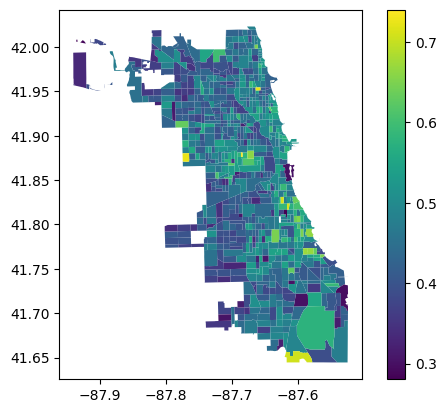

In [18]:
cominc.plot(column = 'gini index', legend = True)

In [19]:
print('The correlation of renter-occupied households to gini index is',
      cominc['renter-occupied housing units'].corr(cominc['gini index']))  
print('The correlation of commute time to gini index is',
      cominc['average commute to work (in min)'].corr(cominc['gini index']))                    
print('The correlation of owner-occupied households to gini index is',
      cominc['owner occupied households'].corr(cominc['gini index']))  
print('The correlation of NO CARS to gini indes', 
      cominc['occupied housing units: no vehicle available'].corr(cominc['gini index']))                    
print('The correlation of 1 CAR to gini index', 
      cominc['occupied housing units: 1 vehicle available'].corr(cominc['gini index']))                    
print('The correlation of 2 CARS to gini index', 
      cominc['occupied housing units: 2 vehicles available'].corr(cominc['gini index']))                    
print('The correlation of 3 CARS to gini index', 
      cominc['occupied housing units: 3 vehicles available'].corr(cominc['gini index']))                    
print('The correlation of 4 CARS to gini index', 
      cominc['occupied housing units: 4 vehicles available'].corr(cominc['gini index']))                    
print('The correlation of 5 CARS to gini index', 
      cominc['occupied housing units: 5 or more vehicles available'].corr(cominc['gini index']))                    


The correlation of renter-occupied households to gini index is 0.17651493761241824
The correlation of commute time to gini index is 0.00021808042439010381
The correlation of owner-occupied households to gini index is -0.23865312222072446
The correlation of NO CARS to gini indes 0.28493517363944443
The correlation of 1 CAR to gini index -0.002914779381707582
The correlation of 2 CARS to gini index -0.3413077976108121
The correlation of 3 CARS to gini index -0.3166827523718332
The correlation of 4 CARS to gini index -0.2570816095095249
The correlation of 5 CARS to gini index -0.1858341979730152


In [20]:
print('The correlation of workers over 16 to gini index', 
      cominc['workers 16 years and over'].corr(cominc['gini index']))                    


The correlation of workers over 16 to gini index -0.1825573445144124


<Axes: >

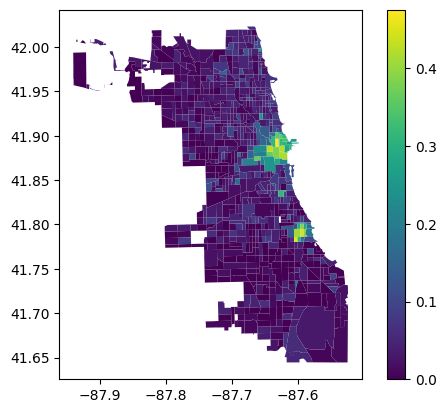

In [21]:
cominc['walked percent'] = cominc['workers 16 years and over: walked']/cominc['workers 16 years and over']

cominc.plot(column = 'walked percent', legend = True)

In [22]:
population['geometry'] = population['geometry'].apply(wkt.loads)
population = gpd.GeoDataFrame(population, crs="EPSG:4326", geometry=population['geometry'])


<Axes: >

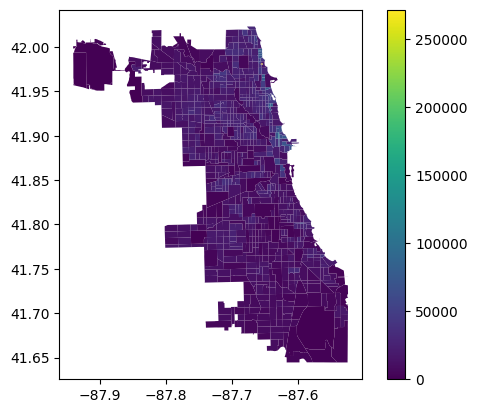

In [23]:
population.plot(column = 'population density (per sq. mile)', legend = True)

In [24]:
income['geometry'] = income['geometry'].apply(wkt.loads)
income = gpd.GeoDataFrame(income, crs="EPSG:4326", geometry=income['geometry'])

<Axes: >

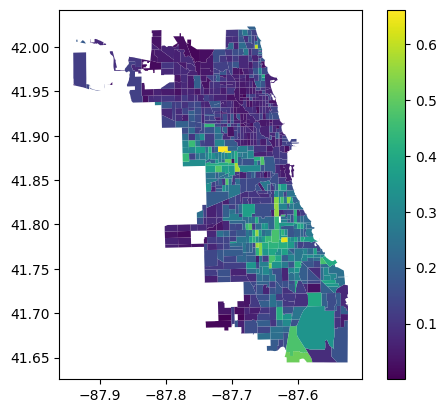

In [25]:

income['pov percent'] = income['population age 18 to 64 for whom poverty status  is determined: living in poverty']/income['population age 18 to 64 for whom poverty status  is determined']

income.plot(column = 'pov percent', legend = True)

<Axes: >

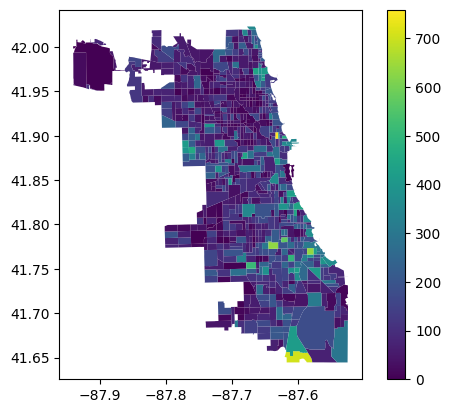

In [26]:
income.plot(column = 'households: less than $10,000', legend = True)

<Axes: >

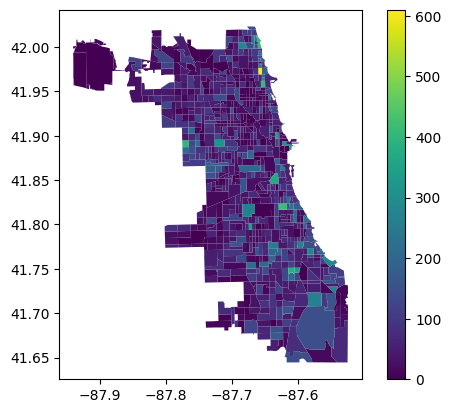

In [27]:
income.plot(column = 'households: $10,000 to $14,999', legend = True)

<Axes: >

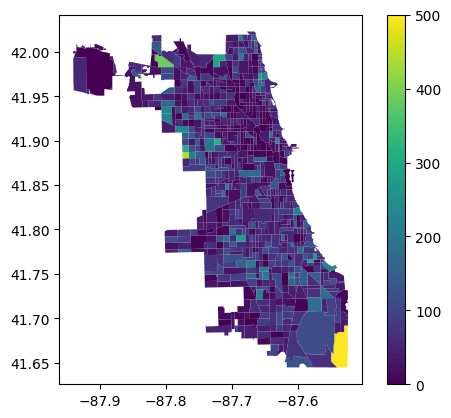

In [28]:
income.plot(column = 'households: $15,000 to $19,999', legend = True)

In [29]:
income['under 50k'] = income['households: $15,000 to $19,999'] + income['households: $20,000 to $24,999'] + income['households: $25,000 to $29,999'] +income['households: $30,000 to $34,999'] + income['households: $35,000 to $39,999'] + income['households: $40,000 to $44,999'] +income['households: $45,000 to $49,999'] + income['households: $10,000 to $14,999'] + income['households: less than $10,000']

<Axes: >

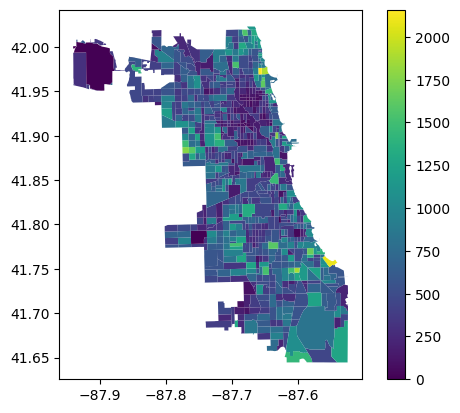

In [30]:
income.plot(column = 'under 50k', legend = True)

## Creating csv file for Commute ## 

In [31]:
commute.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,renter-occupied housing units,renter-occupied housing units: no vehicle available,renter-occupied housing units: 1 vehicle available,renter-occupied housing units: 2 vehicles available,renter-occupied housing units: 3 vehicles available,renter-occupied housing units: 4 vehicles available,renter-occupied housing units: 5 or more vehicles available,geometry,percent public transport,owner occupied households
394,17031081800,"Census Tract 818, Cook County, Illinois",701139,44573,25.0,9212,2289,2185,104,1669,...,4007,1820,1904,283,0,0,0,"POLYGON ((-87.64384 41.89646, -87.64381 41.896...",0.181177,3030
364,17031330102,"Census Tract 3301.02, Cook County, Illinois",402828,0,32.0,6185,2338,1916,422,1972,...,2942,1472,1252,218,0,0,0,"POLYGON ((-87.62667 41.86749, -87.62655 41.867...",0.318836,2932
399,17031833100,"Census Tract 8331, Cook County, Illinois",922812,0,25.0,6021,2140,2003,137,1184,...,1625,566,998,61,0,0,0,"POLYGON ((-87.66680 41.88146, -87.66670 41.881...",0.196645,2748
769,17031120300,"Census Tract 1203, Cook County, Illinois",2055073,0,35.0,3379,2314,2012,302,281,...,88,0,39,49,0,0,0,"POLYGON ((-87.74834 41.99729, -87.74820 41.997...",0.083161,2480
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,25.0,5315,1493,1448,45,559,...,2577,1312,1031,234,0,0,0,"POLYGON ((-87.62086 41.88188, -87.62082 41.882...",0.105174,2360


In [42]:
commute_demos = commute.copy(deep=True)
commute_demos.set_index('geoid',inplace=True)

for i in range(23,29):
    colName = i
    commute_demos[colName]= commute_demos.iloc[:,i]/commute_demos['occupied housing units']
    
commute_demos.head(5)

,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),workers 16 years and over: motorcycle,...,renter-occupied housing units: 5 or more vehicles available,geometry,percent public transport,owner occupied households,23,24,25,26,27,28
geoid,,,,,,,,,,,,,,,,,,,,,
17031081800,"Census Tract 818, Cook County, Illinois",701139,44573,25.0,9212,2289,2185,104,1669,0,...,0,"POLYGON ((-87.64384 41.89646, -87.64381 41.896...",0.181177,3030,0.331533,0.563450,0.100753,0.001705,0.002558,0.000000
17031330102,"Census Tract 3301.02, Cook County, Illinois",402828,0,32.0,6185,2338,1916,422,1972,0,...,0,"POLYGON ((-87.62667 41.86749, -87.62655 41.867...",0.318836,2932,0.292305,0.631427,0.076268,0.000000,0.000000,0.000000
17031833100,"Census Tract 8331, Cook County, Illinois",922812,0,25.0,6021,2140,2003,137,1184,0,...,0,"POLYGON ((-87.66680 41.88146, -87.66670 41.881...",0.196645,2748,0.185914,0.657672,0.152070,0.004345,0.000000,0.000000
17031120300,"Census Tract 1203, Cook County, Illinois",2055073,0,35.0,3379,2314,2012,302,281,0,...,0,"POLYGON ((-87.74834 41.99729, -87.74820 41.997...",0.083161,2480,0.022196,0.337227,0.488318,0.105140,0.040109,0.007009
17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,25.0,5315,1493,1448,45,559,0,...,0,"POLYGON ((-87.62086 41.88188, -87.62082 41.882...",0.105174,2360,0.305651,0.544055,0.150294,0.000000,0.000000,0.000000


In [44]:
commute_demos.rename(columns={commute_demos.columns[39]: 'Percent Occupied Housing: No Vehicles', 
                       commute_demos.columns[40]: 'Percent Occupied Housing: 1 Vehicle',
                        commute_demos.columns[41]: 'Percent Occupied Housing: 2 Vehicles',
                        commute_demos.columns[42]: 'Percent Occupied Housing: 3 Vehicles',
                        commute_demos.columns[43]: 'Percent Occupied Housing: 4 Vehicles',
                        commute_demos.columns[44]: 'Percent Occupied Housing: 5 or More Vehicles'} ,inplace=True)

commute_demos

,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),workers 16 years and over: motorcycle,...,renter-occupied housing units: 5 or more vehicles available,geometry,percent public transport,owner occupied households,Percent Occupied Housing: No Vehicles,Percent Occupied Housing: 1 Vehicle,Percent Occupied Housing: 2 Vehicles,Percent Occupied Housing: 3 Vehicles,Percent Occupied Housing: 4 Vehicles,Percent Occupied Housing: 5 or More Vehicles
geoid,,,,,,,,,,,,,,,,,,,,,
17031081800,"Census Tract 818, Cook County, Illinois",701139,44573,25.0,9212,2289,2185,104,1669,0,...,0,"POLYGON ((-87.64384 41.89646, -87.64381 41.896...",0.181177,3030,0.331533,0.563450,0.100753,0.001705,0.002558,0.000000
17031330102,"Census Tract 3301.02, Cook County, Illinois",402828,0,32.0,6185,2338,1916,422,1972,0,...,0,"POLYGON ((-87.62667 41.86749, -87.62655 41.867...",0.318836,2932,0.292305,0.631427,0.076268,0.000000,0.000000,0.000000
17031833100,"Census Tract 8331, Cook County, Illinois",922812,0,25.0,6021,2140,2003,137,1184,0,...,0,"POLYGON ((-87.66680 41.88146, -87.66670 41.881...",0.196645,2748,0.185914,0.657672,0.152070,0.004345,0.000000,0.000000
17031120300,"Census Tract 1203, Cook County, Illinois",2055073,0,35.0,3379,2314,2012,302,281,0,...,0,"POLYGON ((-87.74834 41.99729, -87.74820 41.997...",0.083161,2480,0.022196,0.337227,0.488318,0.105140,0.040109,0.007009
17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,25.0,5315,1493,1448,45,559,0,...,0,"POLYGON ((-87.62086 41.88188, -87.62082 41.882...",0.105174,2360,0.305651,0.544055,0.150294,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17031350100,"Census Tract 3501, Cook County, Illinois",567876,518735,34.0,1448,679,617,62,502,0,...,0,"POLYGON ((-87.61721 41.84566, -87.61692 41.845...",0.346685,0,0.449700,0.487675,0.062625,0.000000,0.000000,0.000000
17031980100,"Census Tract 9801, Cook County, Illinois",2981781,0,NaN,0,0,0,0,0,0,...,0,"POLYGON ((-87.76206 41.79274, -87.76170 41.792...",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
17031381700,"Census Tract 3817, Cook County, Illinois",196802,0,NaN,0,0,0,0,0,0,...,0,"POLYGON ((-87.62895 41.80662, -87.62892 41.808...",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
